![image](./images/pandas.png)

Pandas est le package de prédilection pour traiter des données structurées.

Pandas est basé sur 2 structures extrêmement liées les Series et le DataFrame.

Ces deux structures permettent de traiter des données sous forme de tableaux indexés.

Les classes de Pandas utilisent des classes de Numpy, il est donc possible d'utiliser les fonctions universelles de Numpy sur les objets Pandas.

In [1]:
# on importe pandas avec :
import pandas as pd
import numpy as np
%matplotlib inline

# Les Series de Pandas

- Les Series sont indexées, c'est leur avantage sur les arrays de NumPy
- On peut utiliser les fonctions `.values` et `.index` pour voir les différentes parties de chaque Series
- On définit une Series par `pd.Series([,], index=['','',])`
- On peut appeler un élément avec `ma_serie['France']`
- On peut aussi faire des conditions :
```python
ma_serie[ma_serie>5000000]
```
```
'France' in ma_serie
```
- Les objets Series peuvent être transformés en dictionnaires en utilisant :
`.to_dict()`

**Exercice :**
    
Définir un objet Series comprenant la population de 5 pays puis afficher les pays ayant une population > 50’000’000.


In [2]:
serie_pop=pd.Series([70,8,300,1300],index=["France","Suisse","USA","Chine"])

In [3]:
serie_pop

France      70
Suisse       8
USA        300
Chine     1300
dtype: int64

In [4]:
serie_pop["France"]

70

In [5]:
serie_pop>50

France     True
Suisse    False
USA        True
Chine      True
dtype: bool

In [6]:
serie_pop[serie_pop>50]

France      70
USA        300
Chine     1300
dtype: int64

In [7]:
# opérateur ou : | , et : &
serie_pop[(serie_pop<50)|(serie_pop>300)]

Suisse       8
Chine     1300
dtype: int64

# D'autres opérations sur les objets series

- Pour définir le nom de la Series, on utilise `.name`
- Pour définir le titre de la colonne des observations, on utilise `.index.name`

**Exercice :**
    
Définir les noms de l’objet et de la colonne des pays pour la Series précédente


In [8]:
serie_pop.name="Population"
serie_pop.index.name="Pays"

# Les données manquantes

Dans pandas, les données manquantes sont identifiés avec les fonctions de Numpy (`np.nan`). On a d'autres fonctions telles que :

In [9]:
pd.isna(pd.Series([2,np.nan,4],index=['a','b','c']))

a    False
b     True
c    False
dtype: bool

In [10]:
pd.notna(pd.Series([2,np.nan,4],index=['a','b','c']))

a     True
b    False
c     True
dtype: bool

# Les dates avec pandas

- Python possède un module datetime qui permet de gérer facilement des dates
- Pandas permet d'appliquer les opérations sur les dates aux Series et aux DataFrame
- Le format es dates Python est `YYYY-MM-DD HH:MM:SS`

- On peut générer des dates avec la fonction `pd.date_range()` avec différente fréquences `freq=`
- On peut utiliser ces dates comme index dans un DataFrame ou dans un objet Series
- On peut changer la fréquence en utilisant `.asfreq()`
- Pour transformer une chaine de caractère en date, on utilise `pd.to_datetime()` avec l’option `dayfirst=True` si on est dans le cas français
-On pourra aussi spécifier un format pour accélérer le processus `%Y%m%d`

In [11]:
pd.datetime.today()

datetime.datetime(2018, 12, 15, 18, 43, 58, 650754)

In [12]:
pd.date_range("2018-12-01",pd.datetime.today())

DatetimeIndex(['2018-12-01', '2018-12-02', '2018-12-03', '2018-12-04',
               '2018-12-05', '2018-12-06', '2018-12-07', '2018-12-08',
               '2018-12-09', '2018-12-10', '2018-12-11', '2018-12-12',
               '2018-12-13', '2018-12-14', '2018-12-15'],
              dtype='datetime64[ns]', freq='D')

**Exercice :**

Créez un objet Series et ajoutez des dates partant du 3 octobre 2017 par jour jusqu’à aujourd’hui. Afficher le résultat dans un graphique (on utilisera la méthode `.plot()`

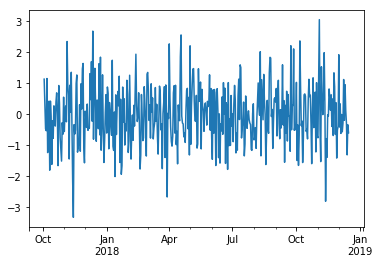

In [13]:
dates=pd.date_range(start="2017-10-03",end=pd.datetime.today(),freq="D")

serie_dates=pd.Series(np.random.randn(len(dates)),index=dates)
serie_dates.plot()

In [14]:
frame_dates=serie_dates.to_frame(name="random")

In [15]:
frame_dates["jour_semaine"]=frame_dates.index.weekday_name

In [16]:
frame_dates.groupby("jour_semaine").mean()

,random
jour_semaine,
Friday,-0.008309
Monday,-0.285861
Saturday,0.146657
Sunday,0.142133
Thursday,-0.234355
Tuesday,0.217632
Wednesday,-0.169727


In [17]:
frame_dates.index=frame_dates.index.tz_localize("Europe/Paris")

In [18]:
frame_dates.index.tz_convert("Africa/Casablanca")

DatetimeIndex(['2017-10-02 23:00:00+01:00', '2017-10-03 23:00:00+01:00',
               '2017-10-04 23:00:00+01:00', '2017-10-05 23:00:00+01:00',
               '2017-10-06 23:00:00+01:00', '2017-10-07 23:00:00+01:00',
               '2017-10-08 23:00:00+01:00', '2017-10-09 23:00:00+01:00',
               '2017-10-10 23:00:00+01:00', '2017-10-11 23:00:00+01:00',
               ...
               '2018-12-05 23:00:00+00:00', '2018-12-06 23:00:00+00:00',
               '2018-12-07 23:00:00+00:00', '2018-12-08 23:00:00+00:00',
               '2018-12-09 23:00:00+00:00', '2018-12-10 23:00:00+00:00',
               '2018-12-11 23:00:00+00:00', '2018-12-12 23:00:00+00:00',
               '2018-12-13 23:00:00+00:00', '2018-12-14 23:00:00+00:00'],
              dtype='datetime64[ns, Africa/Casablanca]', length=439, freq='D')

# Aller plus loin avec les dates

- On peut définir avec pandas des fuseaux horaires
    - On utilise `.tz_localize("Europe/Paris")`
    - On peut changer de fuseau horaire avec `.tz_convert()`

- On peut aussi travailler sur des périodes plutôt que sur des dates
    - On utilise `pd.period_range()`


In [19]:
import pytz
 
for tz in pytz.all_timezones:
    print(tz)


Africa/Abidjan
Africa/Accra
Africa/Addis_Ababa
Africa/Algiers
Africa/Asmara
Africa/Asmera
Africa/Bamako
Africa/Bangui
Africa/Banjul
Africa/Bissau
Africa/Blantyre
Africa/Brazzaville
Africa/Bujumbura
Africa/Cairo
Africa/Casablanca
Africa/Ceuta
Africa/Conakry
Africa/Dakar
Africa/Dar_es_Salaam
Africa/Djibouti
Africa/Douala
Africa/El_Aaiun
Africa/Freetown
Africa/Gaborone
Africa/Harare
Africa/Johannesburg
Africa/Juba
Africa/Kampala
Africa/Khartoum
Africa/Kigali
Africa/Kinshasa
Africa/Lagos
Africa/Libreville
Africa/Lome
Africa/Luanda
Africa/Lubumbashi
Africa/Lusaka
Africa/Malabo
Africa/Maputo
Africa/Maseru
Africa/Mbabane
Africa/Mogadishu
Africa/Monrovia
Africa/Nairobi
Africa/Ndjamena
Africa/Niamey
Africa/Nouakchott
Africa/Ouagadougou
Africa/Porto-Novo
Africa/Sao_Tome
Africa/Timbuktu
Africa/Tripoli
Africa/Tunis
Africa/Windhoek
America/Adak
America/Anchorage
America/Anguilla
America/Antigua
America/Araguaina
America/Argentina/Buenos_Aires
America/Argentina/Catamarca
America/Argentina/ComodRivad

In [20]:
"Europe/Paris" in pytz.all_timezones

True

# Le DataFrame 

- Les DataFrame sont des objets très souples pouvant être construits de différentes façon
- On peut les construire en récupérant des données copier / coller, où directement sur Internet, ou en entrant les valeurs manuellement


- Les DataFrame se rapprochent des dictionnaires et on peut construire ces objets en utilisant `DataFrame(dico)`
- De nombreux détails sur la création des DataFrame se trouve sur ce site :

<http://pandas.pydata.org/pandas-docs/dev/generated/pandas.DataFrame.html>


# Construction de DataFrame

On peut simplement construire un DataFrame avec le classe pd.DataFrame() à partir de différentes structures :

In [21]:
frame1=pd.DataFrame(np.random.randn(10).reshape(5,2),
             index=["obs_"+str(i) for i in range(5)],
             columns=["col_"+str(i) for i in range(2)])
frame1

,col_0,col_1
obs_0,0.100928,0.789095
obs_1,-0.281447,-3.020292
obs_2,0.395028,-0.469424
obs_3,-1.453481,0.014546
obs_4,0.508333,-0.275136


# Opérations sur les DataFrame

On peut afficher le nom des colonnes :

In [22]:
print(frame1.columns)

Index(['col_0', 'col_1'], dtype='object')


On peut accéder à une colonne avec :
- `frame1.col_0` : attention au cas de nom de colonnes avec des espaces...
- `frame1['col_0']`

On peut accéder à une cellule avec :
- `frame1.loc['obs1','col_0']` : on utilise les index et le nom des colonnes
- `frame1.iloc[1,0]` : on utilise les positions dans le DataFrame


# Options de visualisation et de résumé

Pour afficher les 3 premières lignes, on peut utiliser :


In [23]:
frame1.head(3)

,col_0,col_1
obs_0,0.100928,0.789095
obs_1,-0.281447,-3.020292
obs_2,0.395028,-0.469424


Pour afficher un résumé du DF :

In [24]:
frame1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5 entries, obs_0 to obs_4
Data columns (total 2 columns):
col_0    5 non-null float64
col_1    5 non-null float64
dtypes: float64(2)
memory usage: 120.0+ bytes


# Importer des données externes

Pandas est l'outil le plus efficace pour importer des données externes, il prend en charge de nombreux formats dont csv, Excel, SQL, SAS...


## Importation de données avec Pandas

Quel que soit le type de fichier, Pandas possède une fonction :
```python
frame=pd.read_...('chemin_du_fichier/nom_du_fichier',...)
```
Pour écrire un DataFrame dans un fichier, on utilise :
```python
frame.to_...('chemin_du_fichier/nom_du_fichier',...)
```

**Exercice :**
    
Importer un fichier `.csv` avec `pd.read_csv()`. On utilisera le fichier "./data/airbnb.csv"

In [25]:
airbnb = pd.read_csv("https://www.stat4decision.com/airbnb.csv")


C:\Users\s4d-asus-14\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (43,87) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# D'autres types de données

## JSON
Les objets JSON ressemblent à des dictionnaires.

On utilise le module `json` puis la fonction `json.loads()` pour transformer une entrée JSON en objet json

## HTML
On utilise `pd.read_html(url)`. Cet fonction est basée sur les packages `beautifulsoup` et `html5lib`

Cette fonction renvoie une liste de DataFrame qui représentent tous les DataFrame de la page. On ira ensuite chercher l'élément qui nous intéresse avec `frame_list[0]`

**Exercice :**
    
Importez un tableau en html depuis la page <http://www.fdic.gov/bank/individual/failed/banklist.html>

In [26]:
bank=pd.read_html("https://www.fdic.gov/bank/individual/failed/banklist.html")

In [27]:
bank[0]

,Bank Name,City,ST,CERT,Acquiring Institution,Closing Date,Updated Date
0,Washington Federal Bank for Savings,Chicago,IL,30570,Royal Savings Bank,"December 15, 2017","February 21, 2018"
1,The Farmers and Merchants State Bank of Argonia,Argonia,KS,17719,Conway Bank,"October 13, 2017","February 21, 2018"
2,Fayette County Bank,Saint Elmo,IL,1802,"United Fidelity Bank, fsb","May 26, 2017","July 26, 2017"
3,"Guaranty Bank, (d/b/a BestBank in Georgia & Mi...",Milwaukee,WI,30003,First-Citizens Bank & Trust Company,"May 5, 2017","March 22, 2018"
4,First NBC Bank,New Orleans,LA,58302,Whitney Bank,"April 28, 2017","December 5, 2017"
5,Proficio Bank,Cottonwood Heights,UT,35495,Cache Valley Bank,"March 3, 2017","March 7, 2018"
6,Seaway Bank and Trust Company,Chicago,IL,19328,State Bank of Texas,"January 27, 2017","May 18, 2017"
7,Harvest Community Bank,Pennsville,NJ,34951,First-Citizens Bank & Trust Company,"January 13, 2017","May 18, 2017"
8,Allied Bank,Mulberry,AR,91,Today's Bank,"September 23, 2016","September 25, 2017"
9,The Woodbury Banking Company,Woodbury,GA,11297,United Bank,"August 19, 2016","June 1, 2017"


# Importer depuis Excel

On a deux approches pour Excel :
- On peut utiliser `pd.read_excel()`
- On peut utiliser la classe `pd.ExcelFile()`

Dans ce cas, on utilise :
```python
xlsfile=pd.ExcelFile('fichier.xlsx')
xlsfile.parse('Sheet1')
```

**Exercice :** 
    
Importez un fichier Excel avec les deux approches, on utilisera : `credit2.xlsx` et `ville.xls`

In [28]:
frame_credit=pd.read_excel("./Data/credit2.xlsx")

In [29]:
frame_credit.head()

,Age,Gender,Marital_Status,Age_Youngest_Child,Number_of_Workers_in_Household,Percentage_White_Collar_Workers,Household_Debt_to_Equity_Ratio,Income,Homeowner,Customer_ID
0,40,F,S,11,6,37,56,37073,F,5409
1,47,M,M,13,13,30,56,50721,F,5477
2,35,F,U,1,9,33,57,43578,T,5507
3,45,M,U,15,7,30,62,69553,F,8
4,13,F,S,0,7,27,64,37502,T,158


In [30]:
ville_excel=pd.ExcelFile("./Data/ville.xls")

In [31]:
ville_excel.sheet_names

['ville', 'ville-ain']

In [32]:
liste_ain = [feuille for feuille in ville_excel.sheet_names if "ain" in feuille]

In [33]:
frame_ain=ville_excel.parse(liste_ain[0])
frame_ville= ville_excel.parse("ville")

In [34]:
frame_ville.to_html("./villes.html")

# Importer des données SQL

Pandas possède une fonction `read_sql()` qui permet d’importer directement des bases de données ou des queries dans des DataFrame

Il faut tout de même un connecteur pour accéder aux bases de données

Pour mettre en place ce connecteur, on utlise le package SQLAlchemy.

Suivant le type de base de données, on utilisera différents codes mais la structure du code est toujours la même

In [35]:
# on importe l'outil de connexion
from sqlalchemy import create_engine

On crée une connexion
```python
connexion=create_engine("sqlite:///(...).sqlite")
```

On utlise une des fonctions de Pandas pour charger les données
```python
requete="""select ... from ..."""
frame_sql=pd.read_sql_query(requete,connexion)
```

**Exercices :**
    
Importez la base de données SQLite salaries et récupérez la table Salaries dans un DataFrame 

In [36]:
connexion=create_engine("sqlite:///./Data/salaries.sqlite")

In [37]:
connexion.table_names()

['Salaries']

In [38]:
requete = """select * from Salaries"""
frame_sql = pd.read_sql_query(requete,connexion,index_col="Id")

In [39]:
print(frame_sql.shape)
frame_sql

(148654, 12)


,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
Id,,,,,,,,,,,,
1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411,0,400184,,567595.43,567595.43,2011,,San Francisco,
2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966,245132,137811,,538909.28,538909.28,2011,,San Francisco,
3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739,106088,16452.6,,335279.91,335279.91,2011,,San Francisco,
4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916,56120.7,198307,,332343.61,332343.61,2011,,San Francisco,
5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134402,9737,182235,,326373.19,326373.19,2011,,San Francisco,
6,DAVID SULLIVAN,ASSISTANT DEPUTY CHIEF II,118602,8601,189083,,316285.74,316285.74,2011,,San Francisco,
7,ALSON LEE,"BATTALION CHIEF, (FIRE DEPARTMENT)",92492,89062.9,134426,,315981.05,315981.05,2011,,San Francisco,
8,DAVID KUSHNER,DEPUTY DIRECTOR OF INVESTMENTS,256577,0,51322.5,,307899.46,307899.46,2011,,San Francisco,
9,MICHAEL MORRIS,"BATTALION CHIEF, (FIRE DEPARTMENT)",176933,86362.7,40132.2,,303427.55,303427.55,2011,,San Francisco,


# Opérations sur les DataFrame

On peut afficher le nom des colonnes :

In [40]:
print(frame_sql.columns)

Index(['EmployeeName', 'JobTitle', 'BasePay', 'OvertimePay', 'OtherPay',
       'Benefits', 'TotalPay', 'TotalPayBenefits', 'Year', 'Notes', 'Agency',
       'Status'],
      dtype='object')


On peut accéder à une colonne avec :
- `frame1.col_0` : attention au cas de nom de colonnes avec des espaces...
- `frame1['col_0']`

On peut accéder à une cellule avec :
- `frame1.loc['obs1','col_0']` : on utilise les index et le nom des colonnes
- `frame1.iloc[1,0]` : on utilise les positions dans le DataFrame


In [41]:
frame_sql["TotalPay"].mean()

74768.321971703

In [42]:
frame_sql.loc[5,"JobTitle"]

'DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)'

In [43]:
frame_sql.iloc[4,1]

'DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)'

In [44]:
frame_sql[(frame_sql["TotalPay"]>200000) &
          (frame_sql["TotalPayBenefits"]<250000)]

,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
Id,,,,,,,,,,,,
46,EDWIN LEE,MAYOR,249375,0,0,,249375.02,249375.02,2011,,San Francisco,
47,BRYAN RUBENSTEIN,"BATTALION CHIEF, (FIRE DEPARTMENT)",168693,66199.2,14401.4,,249293.30,249293.30,2011,,San Francisco,
48,TRENT RHORER,DEPARTMENT HEAD V,248896,0,0,,248895.77,248895.77,2011,,San Francisco,
49,JAMES DUDLEY,DEPUTY CHIEF III (POLICE DEPARTMENT),233868,0,14851,,248718.64,248718.64,2011,,San Francisco,
50,KEN YEE,"LIEUTENANT, FIRE DEPARTMENT",137730,89856,20848.5,,248434.39,248434.39,2011,,San Francisco,
51,KIRK RICHARDSON,"BATTALION CHIEF, (FIRE DEPARTMENT)",168693,58084.9,20477.2,,247254.61,247254.61,2011,,San Francisco,
52,BARBARA GARCIA,DEPARTMENT HEAD V,246306,0,0,,246305.62,246305.62,2011,,San Francisco,
53,MICHAEL ROLOVICH,"CAPTAIN, FIRE SUPPRESSION",140547,77937.2,26203.7,,244687.81,244687.81,2011,,San Francisco,
54,DARRYL HUNTER,"CAPTAIN, FIRE SUPPRESSION",140547,73207.6,28988.4,,242742.85,242742.85,2011,,San Francisco,


# Les tris avec Pandas 

Pour effectuer des tris, on utilise :
- `.sort_index()` pour le tri des index
- `.sort_values()` pour le tri des données
- `.rank()` affiche le rang des observations

Il peut y avoir plusieurs tris dans la même opération. Dans ce cas, on utilise des listes de colonnes :
```python
frame.sort_values(["col_1","col_2"])
```

In [45]:
frame_sql.sort_values(["JobTitle","TotalPay"],ascending=[True,False])

,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
Id,,,,,,,,,,,,
20766,NAPOLEON VIRAY,ACCOUNT CLERK,60838.2,0,0,,60838.20,60838.20,2011,,San Francisco,
20868,BERNADETTE RAMOS,ACCOUNT CLERK,49777.8,10753.1,0,,60530.87,60530.87,2011,,San Francisco,
21639,SUSAN CHANG,ACCOUNT CLERK,51306.3,5406.34,1814.58,,58527.20,58527.20,2011,,San Francisco,
22973,OLIVIA BOUDREAUX,ACCOUNT CLERK,49778.2,3811.68,1084.76,,54674.59,54674.59,2011,,San Francisco,
24133,LI-XIN CAI,ACCOUNT CLERK,49777.8,1390.45,624,,51792.25,51792.25,2011,,San Francisco,
24175,LOLA THOMAS,ACCOUNT CLERK,49690.5,1356.88,622.87,,51670.27,51670.27,2011,,San Francisco,
24265,TUONG TRUONG,ACCOUNT CLERK,49777.8,0,1618,,51395.80,51395.80,2011,,San Francisco,
24330,AUDREY LEONG,ACCOUNT CLERK,49777.8,0,1440,,51217.78,51217.78,2011,,San Francisco,
24365,WINNIE FUNG,ACCOUNT CLERK,49777.8,0,1300,,51077.78,51077.78,2011,,San Francisco,


**Exercice :** 
    
Triez les données sur les salaires en se basant sur le BasePay et le JobTitle

# Les statistiques simples

Les Dataframe possèdent de nombreuses méthodes pour calculer des statistiques simples :
- `.sum(axis=0)` permet de faire une somme par colonne
- `.sum(axis=1)` permet de faire une somme par ligne
- `.min()` et `.max()` donnent le minimum par colonne
- `.idxmin()` et `.idxmax()` donnent l’index du minimum et du maximum
- `.describe()` affiche un tableau de statistiques descriptives par colonne
- `.corr()` pour calculer la corrélation entre les colonnes

**Exercice :**
    
Obtenir les différentes statistiques descriptives pour les données AirBnB.


In [46]:
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56535 entries, 0 to 56534
Data columns (total 95 columns):
id                                  56535 non-null int64
listing_url                         56535 non-null object
scrape_id                           56535 non-null int64
last_scraped                        56535 non-null object
name                                56532 non-null object
summary                             54371 non-null object
space                               39142 non-null object
description                         56528 non-null object
experiences_offered                 56535 non-null object
neighborhood_overview               33772 non-null object
notes                               18011 non-null object
transit                             36224 non-null object
access                              28754 non-null object
interaction                         27063 non-null object
house_rules                         30185 non-null object
thumbnail_url          

In [47]:
airbnb["number_of_reviews"].describe()

count    56535.000000
mean        14.935827
std         29.745806
min          0.000000
25%          0.000000
50%          4.000000
75%         15.000000
max        488.000000
Name: number_of_reviews, dtype: float64

In [48]:
airbnb.describe(include="all")

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
count,5.653500e+04,56535,5.653500e+04,56535,56532,54371,39142,56528,56535,33772,...,41414.000000,56535,2.0,55545,56535,56535,56535,56535,56535.000000,42362.000000
unique,NaN,56535,NaN,4,54001,53523,38742,56099,1,32552,...,NaN,1,2.0,2,2,5,2,2,NaN,NaN
top,NaN,https://www.airbnb.com/rooms/927294,NaN,2017-04-05,Charming flat in the heart of Paris,"Mon logement est parfait pour les couples, les...",The whole flat will be yours * Cleaned before ...,"Mon logement est parfait pour les couples, les...",none,"Le Marais, it's the festive, fashion, artistic...",...,NaN,f,143676020.0,Paris,f,flexible,f,f,NaN,NaN
freq,NaN,1,NaN,34825,26,84,13,61,56535,103,...,NaN,56535,1.0,55544,44374,20653,55722,55042,NaN,NaN
mean,9.150661e+06,NaN,2.017040e+13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9.258005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.615689,1.169177
std,5.360575e+06,NaN,2.228145e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.878379,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.605544,1.378022
min,2.525000e+03,NaN,2.017040e+13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.010000
25%,4.568772e+06,NaN,2.017040e+13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.270000
50%,8.966819e+06,NaN,2.017040e+13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.670000
75%,1.382403e+07,NaN,2.017040e+13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.530000


In [49]:
airbnb["cancellation_policy"].value_counts(normalize=True).sort_index()

flexible           0.365314
moderate           0.287574
strict             0.346794
super_strict_30    0.000124
super_strict_60    0.000195
Name: cancellation_policy, dtype: float64

In [50]:
frame_sql.corr()

,TotalPay,TotalPayBenefits,Year
TotalPay,1.000000,0.977313,0.032090
TotalPayBenefits,0.977313,1.000000,0.151947
Year,0.032090,0.151947,1.000000


In [51]:
airbnb["number_of_reviews"].agg(["mean","std"])

mean    14.935827
std     29.745806
Name: number_of_reviews, dtype: float64

# Le traitement des données manquantes

- Les données manquantes sont identifiées par `NaN`


- `.dropna()` permet de retirer les données manquantes dans un objet Series et l’ensemble d’une ligne dans le cas d’un DataFrame
- Pour éliminer par colonne, on utilise `.dropna(axis=1)`
- Remplacer toutes les données manquantes `.fillna(valeur)`


# Les jointures avec Pandas

On veut joindre des jeux de données en utilisant des clés (variables communes)

- `pd.merge()` permet de joindre deux DataFrame, on utilise comme options `on='key'`

- On peut utiliser comme option `how=`, on peut avoir :
    - `left` dans ce cas, on garde le jeu de données à gauche et pour les données de droite des valeurs manquantes sont ajoutées.
    - `outer`, on garde toutes les valeurs des deux jeux de données
    - ...

- On peut avoir plusieurs clés et faire une jointure sur les deux clés `on=['key1','key2']`

Pour plus de détails : <http://pandas.pydata.org/pandas-docs/dev/generated/pandas.DataFrame.merge.html>


**Exercice :**
    
Joindre deux dataframes (credit1 et credit2).


In [52]:
frame_credit1=pd.read_table("./Data/credit1.txt")

In [53]:
frame_credit_merged=pd.merge(frame_credit,frame_credit1,on = "Customer_ID", how = "inner")

In [54]:
frame_credit_merged

,Age,Gender,Marital_Status,Age_Youngest_Child,Number_of_Workers_in_Household,Percentage_White_Collar_Workers,Household_Debt_to_Equity_Ratio,Income,Homeowner,Customer_ID,...,Weeks_Since_Last_Offer,Accepted_Personal_Loan,Accepted_Retention,Accepted_Home_Equity_Loan,Accepted_Credit_Card,Annual_value,Interested_in_Personal_Loan,Interested_in_Retention,Interested_in_Home_Equity_Loan,Interested_in_Credit_Card
0,40,F,S,11,6,37,56,37073,F,5409,...,17,F,F,F,F,90,F,F,F,F
1,47,M,M,13,13,30,56,50721,F,5477,...,22,F,F,F,F,260,F,F,F,F
2,35,F,U,1,9,33,57,43578,T,5507,...,27,F,F,T,T,0,F,F,T,F
3,45,M,U,15,7,30,62,69553,F,8,...,51,F,F,F,F,0,F,T,F,F
4,13,F,S,0,7,27,64,37502,T,158,...,8,F,F,F,F,0,F,F,T,F
5,45,F,S,14,10,28,60,34722,F,173,...,32,T,F,F,F,360,F,T,F,F
6,40,M,U,7,10,40,48,56607,F,5408,...,16,F,F,F,F,0,F,F,T,F
7,36,F,S,7,4,36,58,55328,F,5579,...,21,F,F,T,F,0,F,F,F,F
8,26,M,S,0,15,31,52,42752,F,5695,...,34,F,F,F,F,30,F,F,F,T
9,33,M,S,2,12,29,57,71450,T,5732,...,46,F,F,F,F,160,F,F,T,F


# Gestion des duplications

- On utilise `.duplicated()` ou `.drop_duplicates()` dans le cas où on désire effacer les lignes se répétant


- On peut se concentrer sur une seule variables en entrant directement le nom de la variable. Dans ce cas, c’est la première apparition qui compte. Si on veut prendre la dernière apparition, on utilise l’option `keep="last"`. On pourra avoir :
```python
frame1.drop_duplicates(["col_0","col_1"],keep="last")
```

# Discrétisation

Pour discrétiser, on utilise la fonction `pd.cut()`, on va définir une liste de points pour discrétiser et on entre cette liste comme second paramètre de la fonction.

Une fois discrétisé, on peut afficher les modalités obtenues en utilisant `.categories`

On peut aussi compter les occurrence en utilisant `pd.value_counts()`

Il est aussi possible d’entrer le nombre de segments comme second paramètre

On utilisera aussi `qcut()`

**Exercice :**
    
Créez une variable dans le dataframe AirBnB pour obtenir des niveaux de prix.


In [55]:
# on transforme notre colonne textuelle en numérique
airbnb["price_num"]=pd.to_numeric(airbnb["price"].str.replace("$","").str.replace(",",""))

In [56]:
airbnb["price_num"].describe()

count    56535.000000
mean        96.115238
std         99.304542
min          0.000000
25%         55.000000
50%         75.000000
75%        106.000000
max       7790.000000
Name: price_num, dtype: float64

In [57]:
airbnb[airbnb["price_num"]==7790]

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,price_num
36112,13649901,https://www.airbnb.com/rooms/13649901,20170404145355,2017-04-05,Eiffel Garden Triplex (117333),"In the supremely chic 16th arrondissement, the...","In the supremely chic 16th arrondissement, the...","In the supremely chic 16th arrondissement, the...",none,"Location: Paris 16th arrondissement, over view...",...,f,NaN,Paris,f,super_strict_60,f,f,3,NaN,7790.0


In [58]:
pd.cut(airbnb["price_num"],5).value_counts()

(-7.79, 1558.0]     56516
(1558.0, 3116.0]       15
(4674.0, 6232.0]        3
(6232.0, 7790.0]        1
(3116.0, 4674.0]        0
Name: price_num, dtype: int64

In [59]:
airbnb["price_disc"]=pd.qcut(airbnb["price_num"],5)

In [60]:
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56535 entries, 0 to 56534
Data columns (total 97 columns):
id                                  56535 non-null int64
listing_url                         56535 non-null object
scrape_id                           56535 non-null int64
last_scraped                        56535 non-null object
name                                56532 non-null object
summary                             54371 non-null object
space                               39142 non-null object
description                         56528 non-null object
experiences_offered                 56535 non-null object
neighborhood_overview               33772 non-null object
notes                               18011 non-null object
transit                             36224 non-null object
access                              28754 non-null object
interaction                         27063 non-null object
house_rules                         30185 non-null object
thumbnail_url          

# Les tableaux croisés avec Pandas

Les DataFrame possèdent des méthodes pour générer des tableaux croisés, notamment :
```python
frame1.pivot_table()
```
Cette méthode permet de gérer de nombreux cas avec des fonctions standards et sur mesure.

**Exercice :**
    
Afficher un tableau Pivot pour les données AirBnB.

In [61]:
airbnb.pivot_table(values="price_num",
                   index="bedrooms",
                   aggfunc=["mean","count"],
                   columns=["host_is_superhost"]
                  )

mean                count        
host_is_superhost            f           t        f       t
bedrooms                                                   
0.0                  65.142742   80.025000  11139.0   600.0
1.0                  79.800448   96.593917  31716.0  1874.0
2.0                 143.085345  182.549495   7745.0   495.0
3.0                 228.370715  277.964789   2042.0   142.0
4.0                 319.886555  398.914286    476.0    35.0
5.0                 480.213483  304.000000     89.0     6.0
6.0                 656.714286  640.000000     21.0     2.0
7.0                1200.000000  495.000000      3.0     1.0
8.0                 556.000000         NaN      1.0     NaN
10.0                613.333333         NaN      3.0     NaN

# L'utilisation de GroupBy sur des DataFrame

- `.groupby` permet de rassembler des observations en fonction d’une variable dite de groupe


- Par exemple, `frame.groupby('X').mean()` donnera les moyennes par groupes de `X`


- On peut aussi utiliser `.size()` pour connaître la taille des groupes et utiliser d’autres fonctions (`.sum()`)


- On peut effectuer de nombreuses opérations de traitement avec le groupby


In [62]:
airbnb.groupby(["bedrooms","host_is_superhost"])["price_num"].agg(["mean","count"])

mean  count
bedrooms host_is_superhost                    
0.0      f                    65.142742  11139
         t                    80.025000    600
1.0      f                    79.800448  31716
         t                    96.593917   1874
2.0      f                   143.085345   7745
         t                   182.549495    495
3.0      f                   228.370715   2042
         t                   277.964789    142
4.0      f                   319.886555    476
         t                   398.914286     35
5.0      f                   480.213483     89
         t                   304.000000      6
6.0      f                   656.714286     21
         t                   640.000000      2
7.0      f                  1200.000000      3
         t                   495.000000      1
8.0      f                   556.000000      1
10.0     f                   613.333333      3

**Exercice :**
    
- Données sur les salaires


- On utilise le `groupby()` pour rassembler les types d’emploi


- Et on calcule des statistiques pour chaque type


On peut utiliser la méthode `.agg()` avec par exemple `'mean'` comme paramètre

On utilise aussi fréquemment la méthode `.apply()` combinée à une fonction lambda

In [63]:
pd.set_option('display.max_rows', 1000)

In [64]:
frame_sql["job_clean"]=frame_sql["JobTitle"].str.lower()

In [65]:
frame_sql.groupby("job_clean")["TotalPay"].agg(["mean","median","count"]).sort_values("count",ascending=False)

,mean,median,count
job_clean,,,
transit operator,63958.939444,72036.840,9424
special nurse,32717.231561,19710.260,5791
registered nurse,113466.920872,121539.680,4955
custodian,45448.577343,52483.400,3214
firefighter,144222.334675,147439.050,3153
recreation leader,6482.997086,5391.470,2663
deputy sheriff,105816.697872,105693.525,2618
public svc aide-public works,8242.309452,7190.360,2518
police officer 3,134906.890909,137768.890,2421


In [66]:
def f_min_max(x):
    return x.max()-x.min()

In [67]:
frame_sql.groupby("job_clean")["TotalPay"].apply(lambda x : x.max()-x.min()).sort_values(ascending=False)

job_clean
captain iii (police department)                       446979.91
asst med examiner                                     351271.98
lieutenant, fire suppression                          351198.08
emt/paramedic/firefighter                             337204.86
general manager-metropolitan transit authority        336768.31
electronic maintenance tech                           331779.65
senior physician specialist                           322582.27
deputy chief 3                                        322018.53
battlion chief, fire suppressi                        311433.08
battalion chief, (fire department)                    308887.68
deputy sheriff                                        308434.84
battalion chief, fire suppress                        307346.51
captain, fire suppression                             305410.42
transit manager 2                                     298925.33
inspector 3                                           294554.32
lieutenant 3                  

In [68]:
group_sql=frame_sql.groupby("job_clean")

In [69]:
group_sql.filter(lambda x: x['TotalPay'].mean() < 1000)

,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status,job_clean
Id,,,,,,,,,,,,,
35166,FRANK FUNG,"BOARD/COMMISSION MEMBER, GROUP III",1300,0,0,,1300.00,1300.00,2011,,San Francisco,,"board/commission member, group iii"
35191,MICHAEL GARCIA,"BOARD/COMMISSION MEMBER, GROUP III",1250,0,0,,1250.00,1250.00,2011,,San Francisco,,"board/commission member, group iii"
35280,KENDALL GOH,"BOARD/COMMISSION MEMBER, GROUP III",1150,0,0,,1150.00,1150.00,2011,,San Francisco,,"board/commission member, group iii"
35281,CHRISTINE HWANG,"BOARD/COMMISSION MEMBER, GROUP III",1150,0,0,,1150.00,1150.00,2011,,San Francisco,,"board/commission member, group iii"
35282,TANYA PETERSON,"BOARD/COMMISSION MEMBER, GROUP III",1150,0,0,,1150.00,1150.00,2011,,San Francisco,,"board/commission member, group iii"
35299,ARNOLD LERNER,"BOARD/COMMISSION MEMBER, GROUP II",1125,0,0,,1125.00,1125.00,2011,,San Francisco,,"board/commission member, group ii"
35300,WALTER PARK,"BOARD/COMMISSION MEMBER, GROUP II",1125,0,0,,1125.00,1125.00,2011,,San Francisco,,"board/commission member, group ii"
35301,RONALD VERNALI,"BOARD/COMMISSION MEMBER, GROUP II",1125,0,0,,1125.00,1125.00,2011,,San Francisco,,"board/commission member, group ii"
35302,ALYCE BROWN,"BOARD/COMMISSION MEMBER, GROUP II",1125,0,0,,1125.00,1125.00,2011,,San Francisco,,"board/commission member, group ii"


In [70]:
(group_sql['TotalPay'].mean()<1000).sort_values(ascending=False)

job_clean
not provided                                           True
is technician assistant                                True
public safety comm tech                                True
drug court coordinator                                 True
bdcomm mbr, grp3,m=$50/mtg                             True
bdcomm mbr, grp2,m=$25/mtg                             True
commissioner 16.700c, no pay                           True
public safety communications technician                True
board/commission member, group ii                      True
board/commission member, group iii                     True
special assistant xiv                                  True
emergency med svcs agency spec                        False
eligibility worker supervisor                         False
eligibility worker                                    False
zoo curator                                           False
elevator and crane technician                         False
emergency medical services age